In [105]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,f1_score
from sklearn.metrics import confusion_matrix, precision_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import shap

In [14]:
def read_data(training_data_path, testing_data_path):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    training_data = pd.read_csv(training_data_path)
    testing_data = pd.read_csv(testing_data_path)
    
    return training_data, testing_data

# Paths to the CSV files
training_data_path = 'path/to/training_data.csv'
testing_data_path = 'path/to/testing_data.csv'


training_data, testing_data = read_data(training_data_path, testing_data_path)

In [15]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (str): Pandas dataframe
    '''
    return display(df.head())

print(f'training_data:')
df_snapshot(training_data)
print(f'testing_data:')
df_snapshot(testing_data)

training_data:


,EventTime,Measure,Class
0,8/17/2020 18:30,269,NaN
1,8/17/2020 18:40,380,NaN
2,8/17/2020 18:50,386,NaN
3,8/17/2020 19:00,376,NaN
4,8/17/2020 19:10,374,NaN


testing_data:


,EventTime,Measure,Class
0,2021-02-07 19:10:00,678,NaN
1,2021-02-07 19:20:00,667,NaN
2,2021-02-07 19:30:00,647,NaN
3,2021-02-07 19:40:00,661,NaN
4,2021-02-07 19:50:00,692,NaN


In [21]:
def convert_class_field(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (str): Pandas dataframe
        
    '''
    df['Class'] = np.where(df['Class'] == 'S', 1, 0)
    
    return df

training_data = convert_class_field(training_data)
testing_data = convert_class_field(testing_data)

training_data:
testing_data:


,EventTime,Measure,Class
0,2021-02-07 19:10:00,678,0
1,2021-02-07 19:20:00,667,0
2,2021-02-07 19:30:00,647,0
3,2021-02-07 19:40:00,661,0
4,2021-02-07 19:50:00,692,0
...,...,...,...
8006,2021-04-04 12:20:00,477,0
8007,2021-04-04 12:30:00,584,0
8008,2021-04-04 12:40:00,480,0
8009,2021-04-04 12:50:00,472,0


In [17]:
def check_duplicates(df):
    '''
    Returns a dataframe with no duplicates.

    Parameters:
        df (str): Pandas dataframe
        
    '''
    print(f"Original size: {df.shape}")
    df_deduplicated = df.drop_duplicates()
    print(f"Size after removing duplicates: {df_deduplicated.shape}")
    return df_deduplicated

# Apply the function to each dataframe
training_data = check_duplicates(training_data)
testing_data = check_duplicates(testing_data)

Original size: (25000, 3)
Size after removing duplicates: (25000, 3)
Original size: (8011, 3)
Size after removing duplicates: (8011, 3)


In [22]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (str): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

print('training_data:')
null_checker(training_data)
print('\ntesting_data:')
null_checker(testing_data)

training_data:
           Null Count  Null Percentage  Row Count
EventTime           0              0.0      25000
Measure             0              0.0      25000
Class               0              0.0      25000

testing_data:
           Null Count  Null Percentage  Row Count
EventTime           0              0.0       8011
Measure             0              0.0       8011
Class               0              0.0       8011


In [23]:
def data_types(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (str): Pandas dataframe
    '''
    return df.info()

print(f'training_data:')
data_types(training_data)
print(f'testing_data:')
data_types(testing_data)

training_data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EventTime  25000 non-null  object
 1   Measure    25000 non-null  int64 
 2   Class      25000 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 683.6+ KB
testing_data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8010
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EventTime  8011 non-null   object
 1   Measure    8011 non-null   int64 
 2   Class      8011 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 219.1+ KB


In [32]:
def convert_event_time_to_datetime(df):
    """
    Returns a dataframe with converted EventTime field from object to datetime
    
    """
    df['EventTime'] = pd.to_datetime(df['EventTime'])
    
    return df

convert_event_time_to_datetime(training_data)
convert_event_time_to_datetime(testing_data)

training_data:
testing_data:


,EventTime,Measure,Class
0,2021-02-07 19:10:00,678,0
1,2021-02-07 19:20:00,667,0
2,2021-02-07 19:30:00,647,0
3,2021-02-07 19:40:00,661,0
4,2021-02-07 19:50:00,692,0
...,...,...,...
8006,2021-04-04 12:20:00,477,0
8007,2021-04-04 12:30:00,584,0
8008,2021-04-04 12:40:00,480,0
8009,2021-04-04 12:50:00,472,0


In [34]:
def min_max_date(df, name):
    min_date = df['EventTime'].min()
    max_date = df['EventTime'].max()
    
    print(f"{name}:")
    print(f"Min Date: {min_date}")
    print(f"Max Date: {max_date}\n")

min_max_date(training_data, "training_data")
min_max_date(testing_data, "testing_data")

training_data:
Min Date: 2020-08-17 18:30:00
Max Date: 2021-02-07 19:00:00

testing_data:
Min Date: 2021-02-07 19:10:00
Max Date: 2021-04-04 13:00:00



In [38]:
def compute_measure_statistics(df):
    
    """
    Returns descriptive statistics for Measure field.
    
    """
    
    measure_stats = df['Measure'].describe()
    
    return measure_stats

compute_measure_statistics(training_data)

count    25000.000000
mean       386.876760
std        104.100969
min          1.000000
25%        315.000000
50%        375.000000
75%        450.000000
max       1000.000000
Name: Measure, dtype: float64

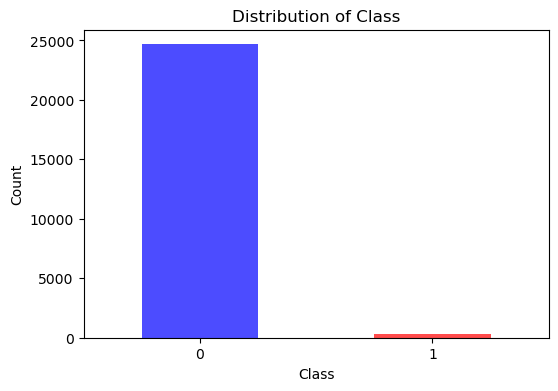

In [30]:
def plot_class_distribution(df):
    
    plt.figure(figsize=(6, 4))
    df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'], alpha=0.7)
    plt.title('Distribution of Class')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['0', '1'], rotation=0)
    plt.show()
    
plot_class_distribution(training_data)

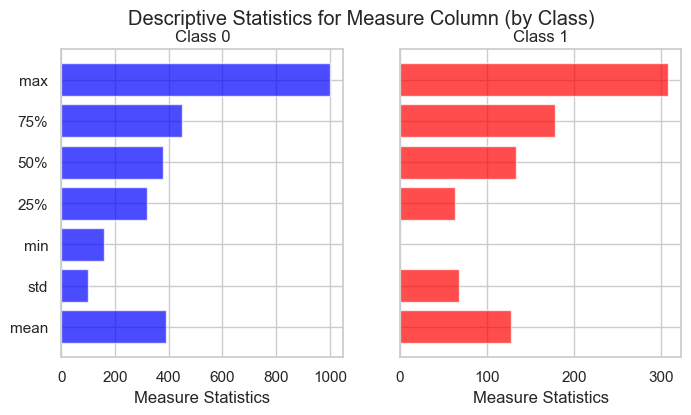

In [60]:
def measure_statistics_by_class(df):
    
    class_0_data = df[df['Class'] == 0]
    class_1_data = df[df['Class'] == 1]

    # Compute descriptive statistics for each class
    class_0_stats = class_0_data['Measure'].describe()[1:]
    class_1_stats = class_1_data['Measure'].describe()[1:]

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

    ax0.barh(class_0_stats.index, class_0_stats, color='blue', alpha=0.7)
    ax0.set_title('Class 0')
    ax0.set_xlabel('Measure Statistics')
    
    ax1.barh(class_1_stats.index, class_1_stats, color='red', alpha=0.7)
    ax1.set_title('Class 1')
    ax1.set_xlabel('Measure Statistics')

    fig.suptitle('Descriptive Statistics for Measure Column (by Class)')
    plt.show()

measure_statistics_by_class(training_data)

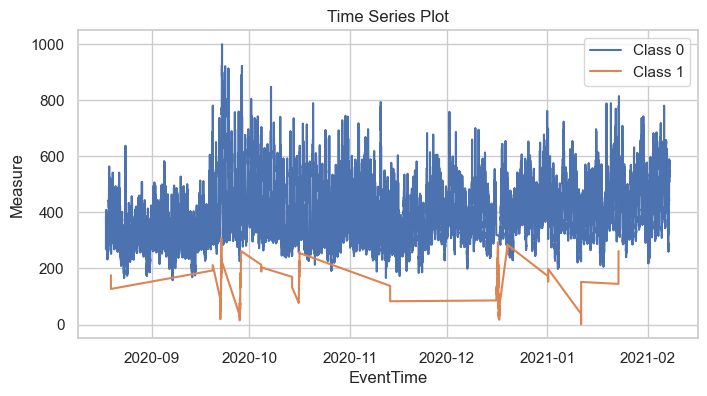

In [59]:
def plot_time_series(df):
    
    """
    Returns a times series plot with dates in x-axis,
    Measure y-axis and grouped by class label
    
    """
    
    df['EventTime'] = pd.to_datetime(df['EventTime'])
    grouped = df.groupby('Class')
    
    plt.figure(figsize=(8, 4))
    
    for name, group in grouped:
        plt.plot(group['EventTime'], group['Measure'], label=f'Class {name}')
    
    plt.title('Time Series Plot')
    plt.xlabel('EventTime')
    plt.ylabel('Measure')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_time_series(training_data)

In [55]:
def extract_date_time_components(df):
    
    # Extract Hour, Day of the month, and Day of the week
    df['Hour'] = df['EventTime'].dt.hour
    df['DayOfMonth'] = df['EventTime'].dt.day
    df['DayOfWeek'] = df['EventTime'].dt.day_name()
    
    return df

training_data = extract_date_time_components(training_data)
testing_data = extract_date_time_components(testing_data)

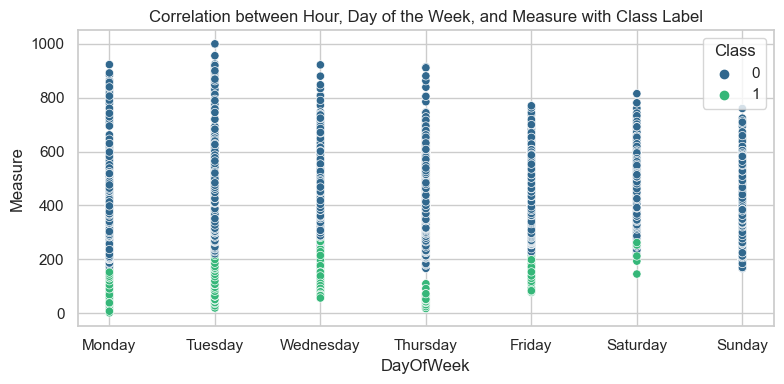

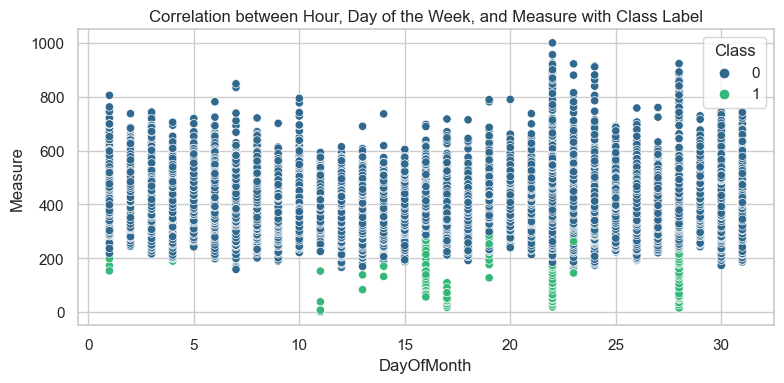

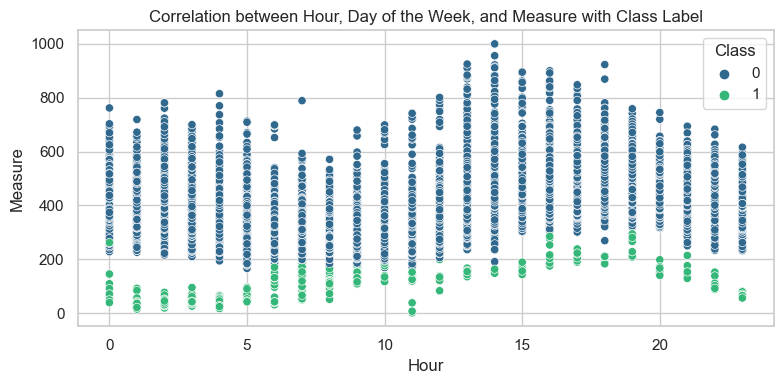

In [64]:
def visualize_correlation(df, feature):
    
    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")
    sns.scatterplot(data=df, x=feature, y='Measure', hue='Class', palette='viridis', markers=['o', 's'], legend='full')
    plt.title('Correlation between Hour, Day of the Week, and Measure with Class Label')
    plt.tight_layout()
    plt.show()
      
visualize_correlation(training_data,'DayOfWeek')
visualize_correlation(training_data,'DayOfMonth')
visualize_correlation(training_data,'Hour')

In [74]:
def one_hot_key_encoding(df, column_name):
    '''
    One hotkey encode column.
            Parameters:
                    df (DataFrame): Pandas dataframe
                    column_name (str): Column name
            Returns:
                    Dataframe with one hotkey encoded column(s) and the original column dropped
    '''

    df_encoded = pd.get_dummies(df, columns=[column_name], prefix=[column_name], dtype=int)
    #df_encoded.drop(columns=[column_name], axis=1, inplace=True) 
    
    return df_encoded

training_data = one_hot_key_encoding(training_data, 'DayOfWeek')
testing_data = one_hot_key_encoding(testing_data,  'DayOfWeek')

In [77]:
def calculate_predictive_power(data_frame, target_column):
    '''
    Calculates predictive power of independent features on target/class feature.
            Parameters:
                    df (str): Pandas dataframe
                    target_column (int): target_column
            Returns:
                    Dataframe with showing predictive power score (pps) for each independent feature.
    '''
    data_frame[target_column] = data_frame[target_column].astype(str)
    predictors_df = pps.predictors(data_frame, target_column)
    predictors_df = predictors_df.sort_values(by="ppscore", ascending=False)
    
    return predictors_df

# call function
predictors_result = calculate_predictive_power(training_data, "Class")
predictors_result

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,EventTime,Class,0.925927,classification,True,weighted F1,0.975766,0.998205,DecisionTreeClassifier()
1,Measure,Class,0.747104,classification,True,weighted F1,0.975766,0.993871,DecisionTreeClassifier()
2,Hour,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
3,DayOfMonth,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
4,DayOfWeek_Friday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
5,DayOfWeek_Monday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
6,DayOfWeek_Saturday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
7,DayOfWeek_Sunday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
8,DayOfWeek_Thursday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()
9,DayOfWeek_Tuesday,Class,0.000001,classification,True,weighted F1,0.975766,0.975766,DecisionTreeClassifier()


In [120]:
def set_features_and_target(df):
    '''
    Returns two data frames with features and target variables.
            Parameters:
                    df (str): Pandas dataframe
    '''
    X = df.drop(['Class','EventTime'], axis=1)
    y = df['Class']
    
    return X,y
                 
X,y = set_features_and_target(training_data)               

In [121]:
def drop_class_label_testing_data(df, target):
    
    """
    Returns testing data without the class label as we are trying to predict this.
    
    """

    df = df.drop([target], axis=1)
    
    return df
                 
testing_data = drop_class_label_testing_data(testing_data,'Class')               

KeyError: "['Class'] not found in axis"

In [122]:
def train_test_split_df(X,y):
    '''
    Create train test split.
            Parameters:
                    df (str): Pandas dataframe
            Returns:
                    Train and test dataframes
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(X,y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(17500, 10) (17500,)
(7500, 10) (7500,)


In [123]:
def model_application(X_train,y_train,optimiser):
    # Building model
    '''
    Model application. If optimiser is true , a grid search is applied to optimise the model. 
    If optimiser is false base model is used
            Parameters:
                    X_train (str): Pandas dataframe of feature set training variables
                    y_train (str): Pandas dataframe of predictor variable for training set.
                    optimiser (str): Boolean to indicate optimisation required. 
            Returns:
                    Random Forest model.
    '''
    if optimiser == True:
                # Building our model with K-fold validation and GridSearch to find the best parameters

                # Defining all the parameters
                params = {
                'max_features': [1, 3, 10],
                'min_samples_split': [2, 3, 10],
                'min_samples_leaf': [1, 3, 10],
                'criterion': ["entropy", "gini"]
                }

                cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=15)

                # Building model
                rf = RandomForestClassifier()

                # Parameter estimating using GridSearch
                grid = GridSearchCV(rf, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)
                
                # Fitting the model
                grid.fit(X_train, y_train)

                dtc_grid_val_score = grid.best_score_
                print('Best Score:', dtc_grid_val_score)
                print('Best Params:', grid.best_params_)
                print('Best Estimator:', grid.best_estimator_)

                rf_clf = grid.best_estimator_
    else:
                rf_clf = RandomForestClassifier(n_estimators=150,
                                                max_depth=16,
                                                criterion='gini',
                                                class_weight='balanced',
                                                min_samples_split=10,
                                                max_leaf_nodes=20,
                                                max_features=0.5,
                                                bootstrap=True)
                rf_clf.fit(X_train, y_train)

    return rf_clf

optimiser = False
rf_clf = model_application(X_train,y_train,optimiser)

In [124]:
def model_predict(X_test):
    '''
    Create y_pred , model prediction based on test set features.
            Parameters:
                    X_test (str): Pandas dataframe
            Returns:
                    y_pred
    '''
    y_pred = rf_clf.predict(X_test)
    
    return y_pred

y_pred = model_predict(X_test)
print('Training Accuracy Score(%):',rf_clf.score(X_train,y_train)*100)
print('Test Accuracy Score(%):',rf_clf.score(X_test,y_test)*100)

Training Accuracy Score(%): 99.45714285714286
Test Accuracy Score(%): 99.4


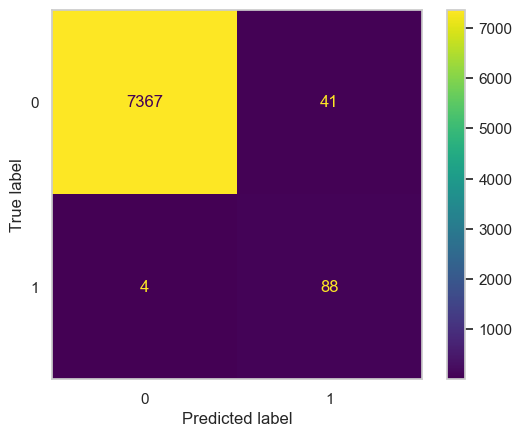

array([[7367,   41],
       [   4,   88]], dtype=int64)

In [153]:
def generate_confusion_matrix(y_test, y_pred):
    '''
    Generates confusion matrix.
            Parameters:
                    y_test (array): numpy array of actual values
                    y_pred (array): numpy array of predicted values
            Returns:
                    Y_pred
    '''
    
    cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
    disp.plot()
    plt.grid(False) 
    plt.show()
    
    return cm

generate_confusion_matrix(y_test, y_pred)

In [126]:
def generate_perfomance_metrics(y_test,y_pred):
    '''
    Generates perfomance metrics precision, recall, f1 score, accuracy
            Parameters:
                    y_test (array): numpy array of actual values
                    y_pred (array): numpy array of predicted values
            Returns:
                    y_pred
    '''
    rf_model_score = accuracy_score(y_test, y_pred)
    print('Model Accuracy:', rf_model_score)
    return print('Classification Report:\n', classification_report(y_test, y_pred))

generate_perfomance_metrics(y_test,y_pred)

Model Accuracy: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7408
           1       0.68      0.96      0.80        92

    accuracy                           0.99      7500
   macro avg       0.84      0.98      0.90      7500
weighted avg       1.00      0.99      0.99      7500



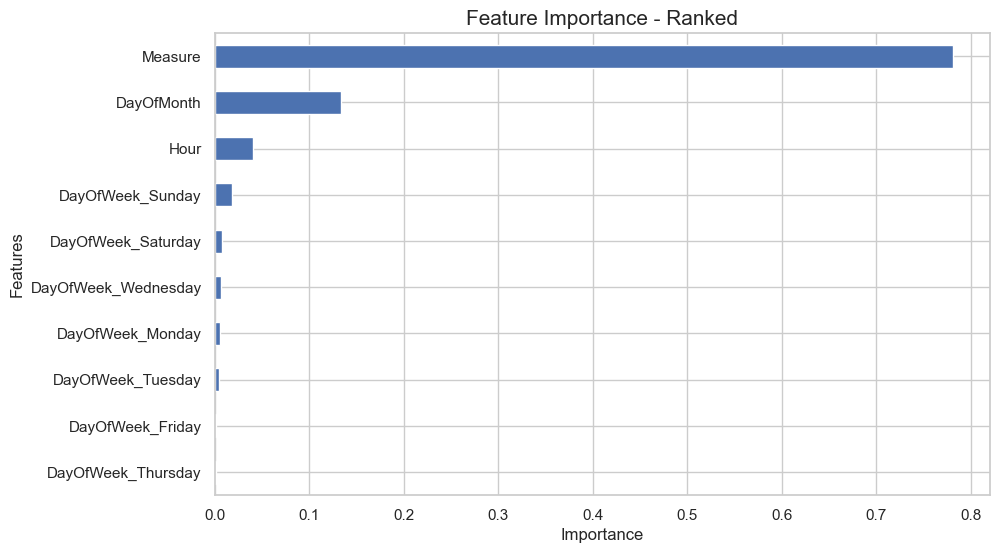

In [127]:
def plot_feature_importance(model, feature_names, n=40):
    
    '''
    Produces a plot displaying features that are most important predictors of the target feature.
            Parameters:
                    random forest model
                    feature names
    '''
    
    plt.figure(figsize=(10, 6))

    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    feat_importances.nsmallest(n).plot(kind='barh')
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance - Ranked", fontsize=15)
    plt.show()

plot_feature_importance(rf_clf, X_train.columns)

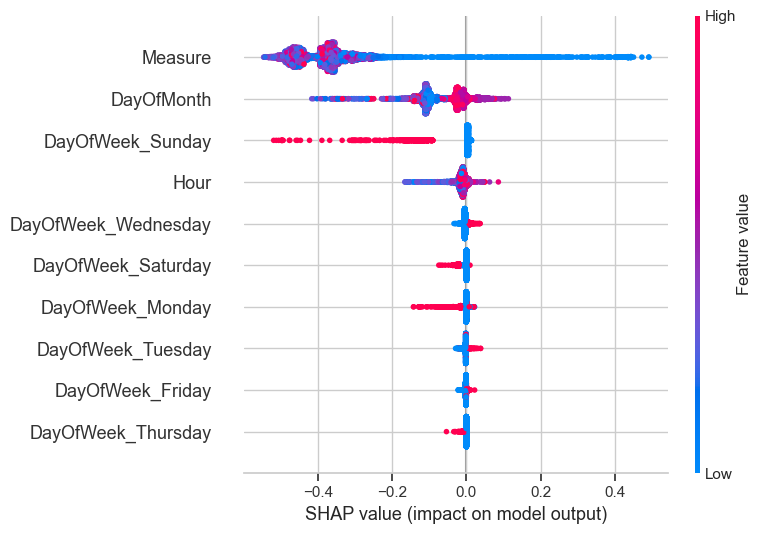

In [130]:
def generate_shapley_plots(model, X, class_index=1):
    """
    Generate SHAP summary plots for feature interpretability.

    Parameters:
        model: The trained machine learning model.
        X: The feature data (X_test) for which SHAP values will be calculated.
        class_index: Index of the class for which SHAP values should be calculated (default is 1).

    Returns:
        None (displays the SHAP summary plot).
    """
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)

    # Calculate SHAP values for all of X
    shap_values = explainer.shap_values(X)

    # Create summary plot
    shap.summary_plot(shap_values[class_index], X, show=False)

    plt.show()

generate_shapley_plots(rf_clf, X_test)

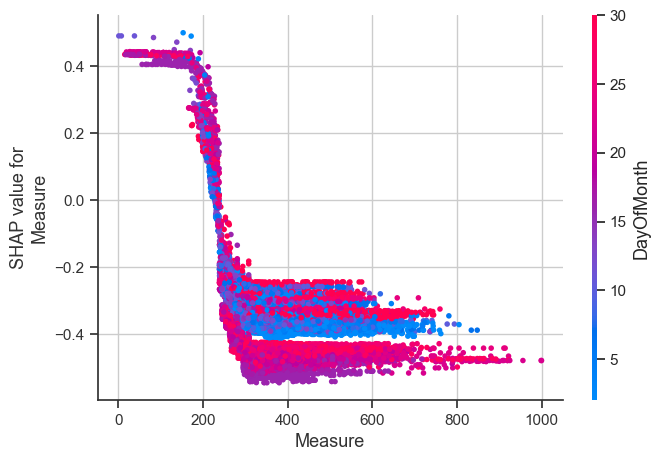

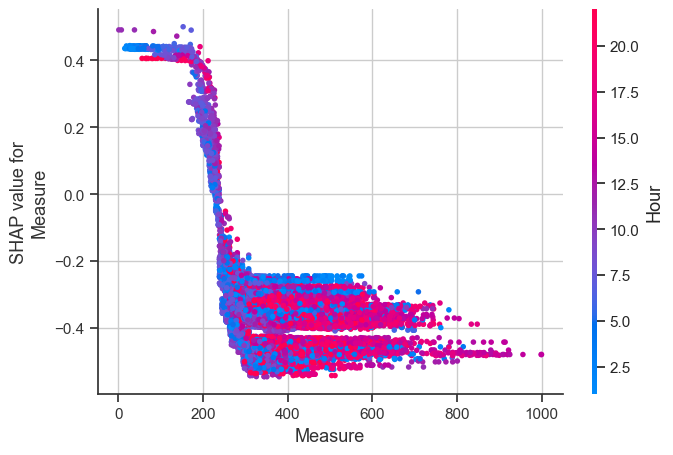

In [142]:
def explainer_plot(feature_1,feature_2):
    
    """
    Generate SHAP dependence plot for feature interpretability.

    Parameters:
        model: The trained machine learning model.
        X: The feature data for which SHAP values will be calculated.
        features: The name of the features for which the dependence plot will be generated.
        class_index: Index of the class for which SHAP values should be calculated (default is 1).

    Returns:
        None (displays the SHAP dependence plot).
    """
    
    explainer = shap.TreeExplainer(rf_clf)
    shap_values = explainer.shap_values(X)
    shap.dependence_plot(feature_1, shap_values[1], X, interaction_index=feature_2)

#DayOfMonth    
explainer_plot("Measure","DayOfMonth")
#Hour   
explainer_plot("Measure","Hour")

In [150]:
# Use trained model to classify extreme drops on testing data
predicted_probabilities = rf_clf.predict_proba(testing_data[X_train.columns])[:, 1]
# Define a threshold (e.g., 0.5)
threshold = 0.5
# Convert predicted probabilities to binary values (0 or 1)
testing_data['Class'] = (predicted_probabilities >= threshold).astype(int)